# Importing Libraries and data

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [112]:
df = pd.read_csv('data.csv')
df.head(10)

,YEAR,INFLATION RATE,USD VALUE,ECONOMY,UMENLOYMENT RATE,MORTAGE RATE,POPULATION,CPI,PERMITS,EXISITING HOUSE,NEW HOUSE FOR SCALE,TOTAL HOUSE SUPPLY,PRICE
0,2001,4.00,103995.28,1.00,4.2,6.97,1.03,176.35,19646.0,2068.0,3621.0,5689.0,1358.14
1,2002,2.22,106300.06,1.72,4.2,6.54,0.94,180.26,20988.0,2118.0,3930.0,6048.0,1467.34
2,2003,2.52,108978.33,2.86,4.3,5.83,0.88,180.26,22661.0,2270.0,4184.0,6454.0,1604.77
3,2004,2.57,111774.53,3.80,4.4,5.84,0.88,184.80,24691.0,2244.0,4745.0,6989.0,1805.27
4,2005,3.26,115415.99,3.51,4.4,5.87,0.90,189.54,25921.0,2846.0,5610.0,8456.0,2060.84
5,2006,3.80,119804.41,2.85,4.5,6.41,0.94,195.72,22124.0,3450.0,6641.0,10091.0,2201.38
6,2007,3.16,123592.85,1.88,4.6,6.34,0.96,203.16,16698.0,3520.0,6375.0,9895.0,2159.04
7,2008,3.18,127527.69,-0.14,4.9,6.03,0.96,209.58,10750.0,3130.0,5107.0,8237.0,1968.70
8,2009,0.04,128001.08,-2.01,5.0,5.04,0.93,216.26,6984.0,2740.0,3346.0,6086.0,1782.52
9,2010,-0.04,127526.76,2.56,5.3,4.69,0.88,217.06,7244.0,3020.0,2536.0,5556.0,1736.04


In [60]:
df.shape

(20, 13)

In [61]:
df.columns

Index(['YEAR', 'INFLATION RATE', 'USD VALUE', 'ECONOMY', 'UMENLOYMENT RATE',
       'MORTAGE RATE', 'POPULATION', 'CPI', 'PERMITS', 'EXISITING HOUSE',
       'NEW HOUSE FOR SCALE', 'TOTAL HOUSE SUPPLY', 'PRICE'],
      dtype='object')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 20 non-null     int64  
 1   INFLATION RATE       20 non-null     float64
 2   USD VALUE            20 non-null     float64
 3   ECONOMY              20 non-null     float64
 4   UMENLOYMENT RATE     20 non-null     float64
 5   MORTAGE RATE         20 non-null     float64
 6   POPULATION           20 non-null     float64
 7   CPI                  20 non-null     float64
 8   PERMITS              20 non-null     float64
 9   EXISITING HOUSE      20 non-null     float64
 10  NEW HOUSE FOR SCALE  20 non-null     float64
 11  TOTAL HOUSE SUPPLY   20 non-null     float64
 12  PRICE                20 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 2.2 KB


In [63]:
df.describe()

,YEAR,INFLATION RATE,USD VALUE,ECONOMY,UMENLOYMENT RATE,MORTAGE RATE,POPULATION,CPI,PERMITS,EXISITING HOUSE,NEW HOUSE FOR SCALE,TOTAL HOUSE SUPPLY,PRICE
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.0000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,2010.50000,2.391500,130350.144500,1.512000,5.180000,4.94550,0.810000,216.4660,15672.850000,2206.300000,3723.550000,5929.850000,1998.16850
std,5.91608,1.047681,16588.184216,2.577666,0.673248,1.17353,0.139246,26.8572,5729.861276,703.828111,1404.900763,1910.399304,409.53361
min,2001.00000,-0.040000,103995.280000,-7.970000,4.200000,3.11000,0.590000,176.3500,6984.000000,1060.000000,1750.000000,3580.000000,1358.14000
25%,2005.75000,2.080000,118707.305000,1.617500,4.475000,3.97750,0.685000,194.1750,11579.500000,1732.500000,2582.500000,4514.000000,1725.01000
50%,2010.50000,2.545000,128604.475000,2.205000,5.400000,4.61500,0.855000,216.6600,15680.000000,2093.000000,3637.000000,5449.000000,1972.60000
75%,2015.25000,3.017500,141258.492500,2.852500,5.750000,5.91000,0.932500,234.4300,19981.500000,2766.500000,4324.250000,6587.750000,2178.91750
max,2020.00000,4.000000,160268.370000,3.800000,5.900000,6.97000,1.030000,265.9500,25921.000000,3520.000000,6641.000000,10091.000000,3145.64000


In [64]:
df.isnull().sum()

YEAR                   0
INFLATION RATE         0
USD VALUE              0
ECONOMY                0
UMENLOYMENT RATE       0
MORTAGE RATE           0
POPULATION             0
CPI                    0
PERMITS                0
EXISITING HOUSE        0
NEW HOUSE FOR SCALE    0
TOTAL HOUSE SUPPLY     0
PRICE                  0
dtype: int64

# EDA

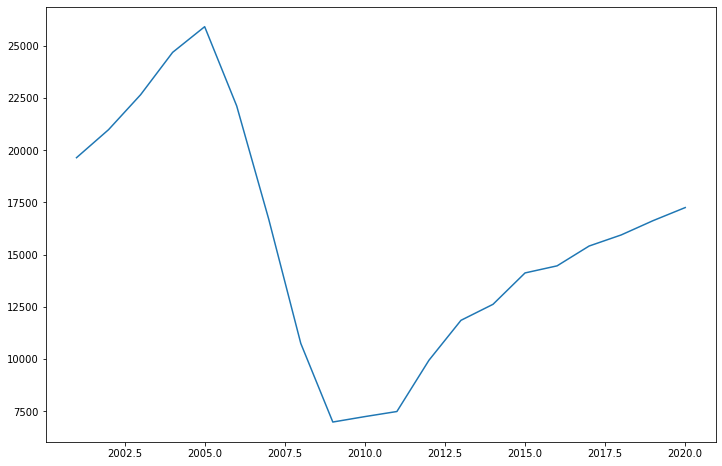

In [65]:
plt.figure(figsize=(12,8))
plt.plot(df['YEAR'],df['PERMITS'])
plt.show()

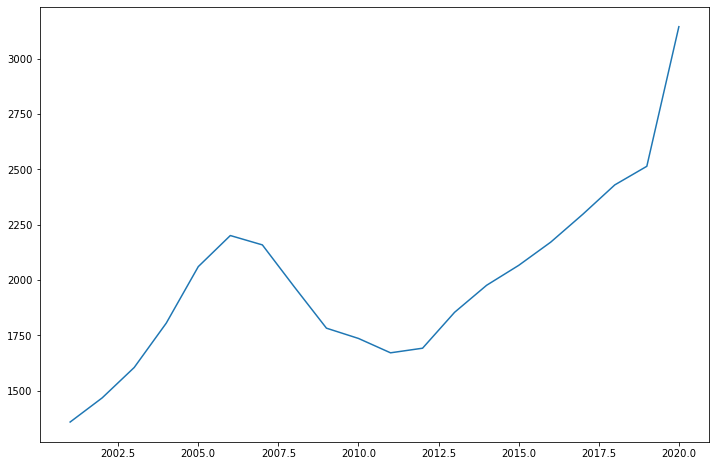

In [66]:
plt.figure(figsize=(12,8))
plt.plot(df['YEAR'],df['PRICE'])
plt.show()

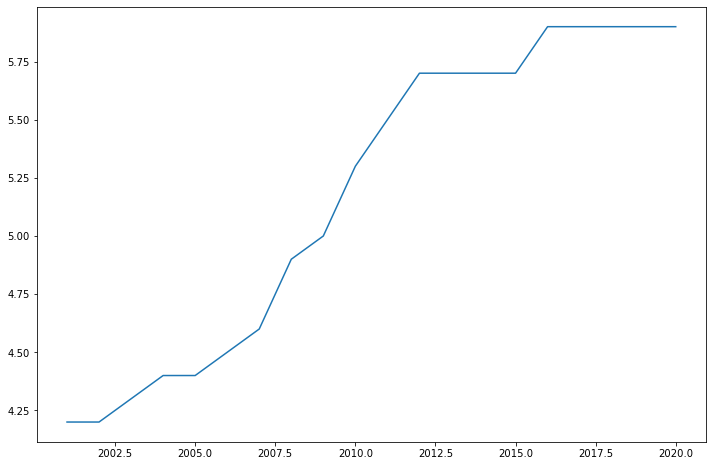

In [67]:
plt.figure(figsize=(12,8))
plt.plot(df['YEAR'],df['UMENLOYMENT RATE'])
plt.show()

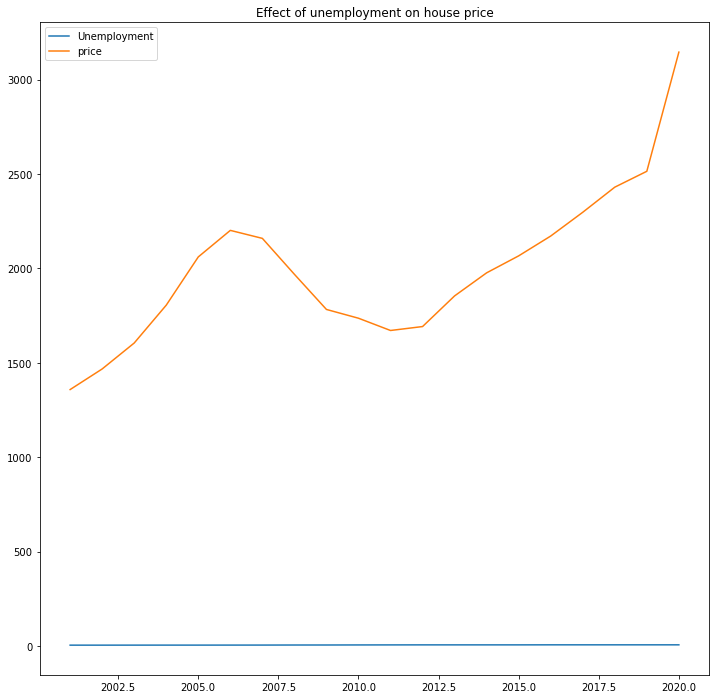

In [68]:
plt.figure(figsize=(12,12))
plt.plot(df['YEAR'],df['UMENLOYMENT RATE'],label="Unemployment")
plt.plot(df['YEAR'],df['PRICE'],label='price')
plt.title("Effect of unemployment on house price")
plt.legend()
plt.show()

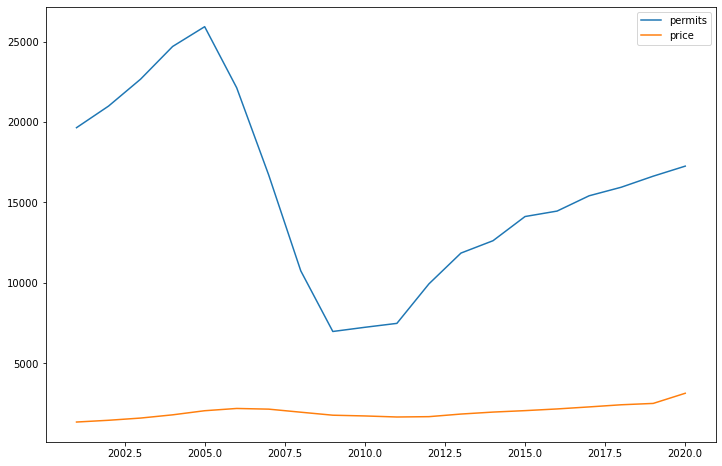

In [69]:
plt.figure(figsize=(12,8))
plt.plot(df['YEAR'],df['PERMITS'],label="permits")
plt.plot(df['YEAR'],df['PRICE'],label='price')
plt.legend()
plt.show()

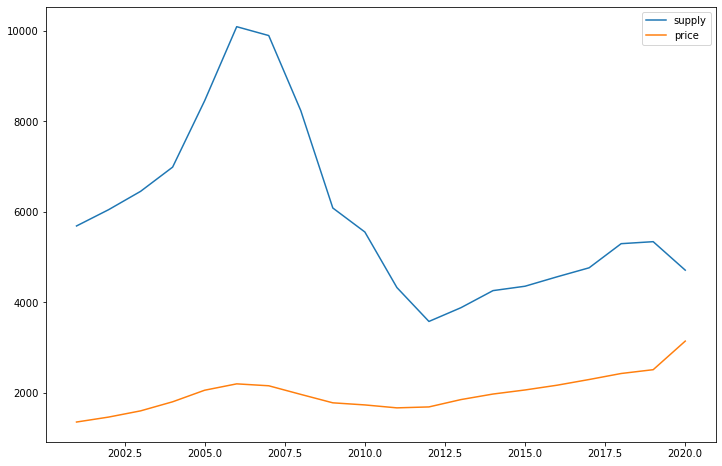

In [70]:
plt.figure(figsize=(12,8))
plt.plot(df['YEAR'],df['TOTAL HOUSE SUPPLY'],label="supply")
plt.plot(df['YEAR'],df['PRICE'],label='price')
plt.legend()
plt.show()

At the end of 2019  as the total house supply decreases the price getting higher

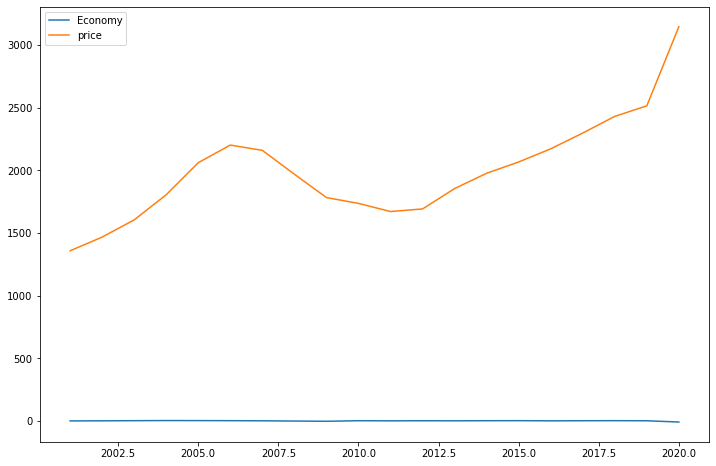

In [71]:
plt.figure(figsize=(12,8))
plt.plot(df['YEAR'],df['ECONOMY'],label="Economy")
plt.plot(df['YEAR'],df['PRICE'],label='price')
plt.legend()
plt.show()

with decerase in economy the price of the houses risen up.

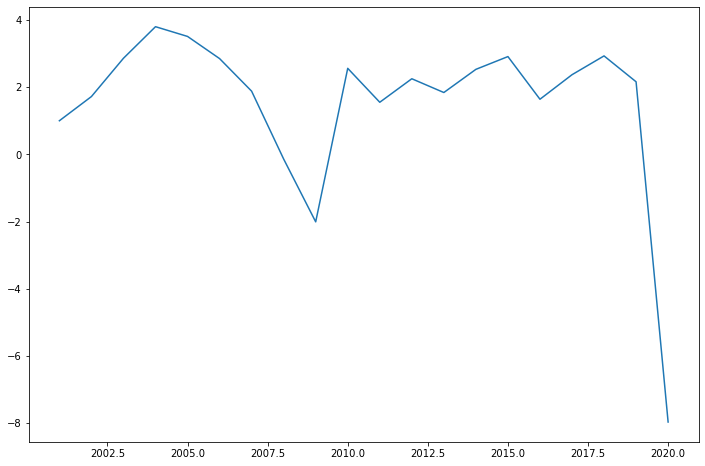

In [72]:
plt.figure(figsize=(12,8))
plt.plot(df['YEAR'],df['ECONOMY'])
plt.show()

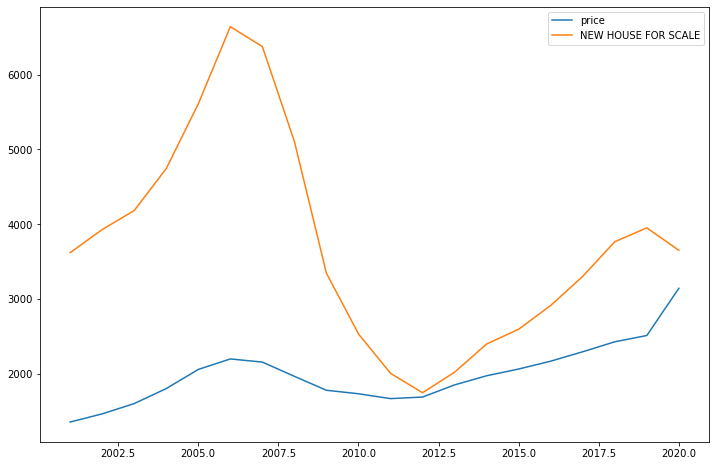

In [73]:
plt.figure(figsize=(12,8))
plt.plot(df['YEAR'],df['PRICE'],label="price")
plt.plot(df['YEAR'],df['NEW HOUSE FOR SCALE'],label='NEW HOUSE FOR SCALE')
plt.legend()
plt.show()

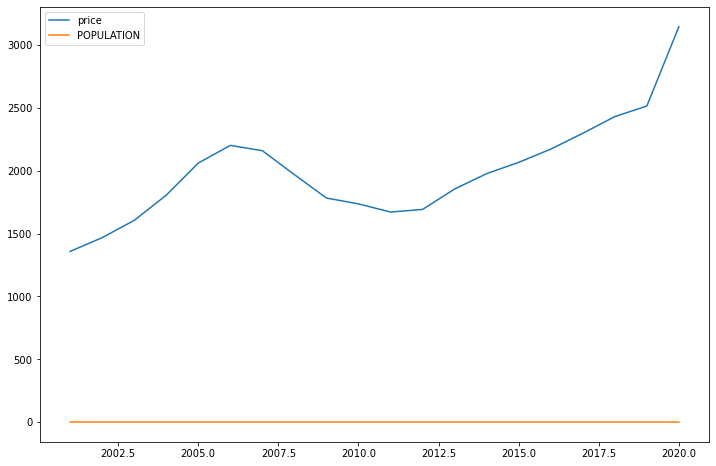

In [74]:
plt.figure(figsize=(12,8))
plt.plot(df['YEAR'],df['PRICE'],label="price")
plt.plot(df['YEAR'],df['POPULATION'],label='POPULATION')
plt.legend()
plt.show()

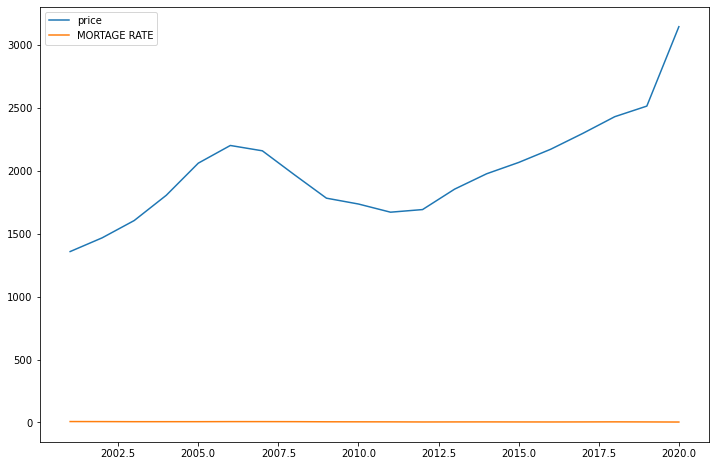

In [75]:
plt.figure(figsize=(12,8))
plt.plot(df['YEAR'],df['PRICE'],label="price")
plt.plot(df['YEAR'],df['MORTAGE RATE'],label='MORTAGE RATE')
plt.legend()
plt.show()

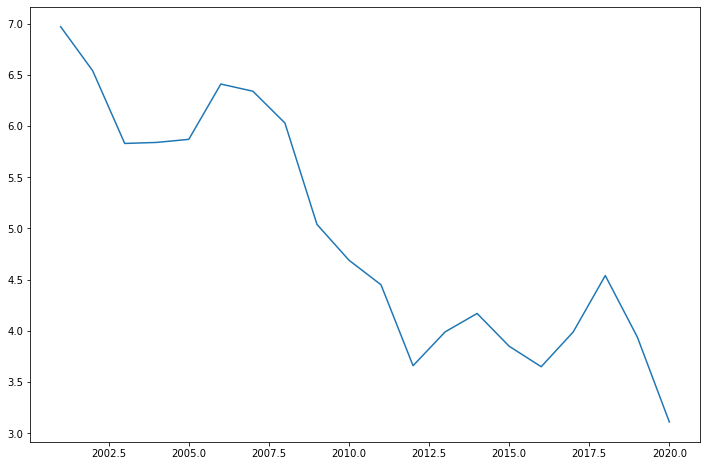

In [76]:
plt.figure(figsize=(12,8))
plt.plot(df['YEAR'],df['MORTAGE RATE'])
plt.show()

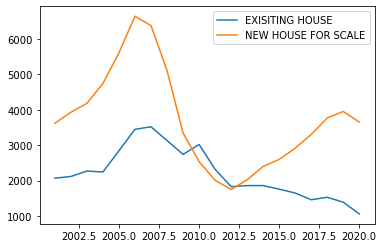

In [77]:
#day one, the age and speed of 13 cars:
x = df['YEAR']
y = df['EXISITING HOUSE']
plt.plot(x, y,label="EXISITING HOUSE")

x = df['YEAR']
y = df['NEW HOUSE FOR SCALE']
plt.plot(x, y,label="NEW HOUSE FOR SCALE")
plt.legend()
plt.show()

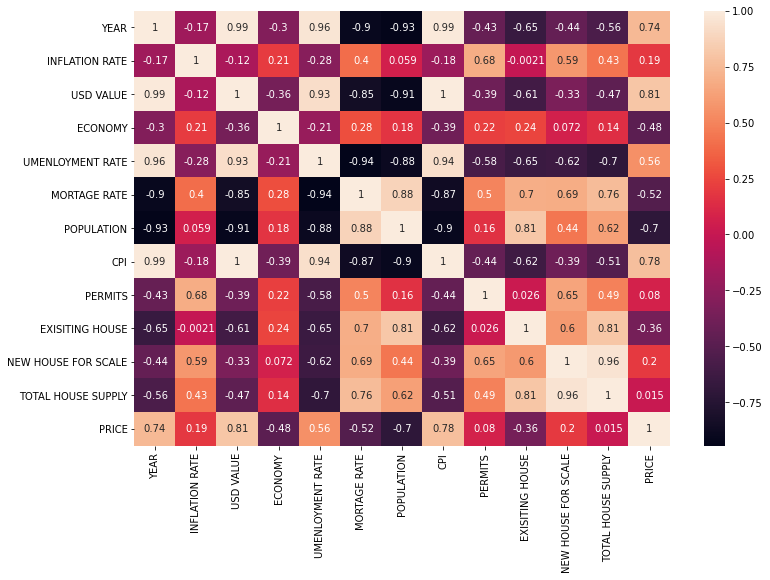

In [78]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [113]:
x=df.drop(['PRICE','USD VALUE'],axis=1)
y=df['PRICE']

In [114]:
#Spiltting into test and train

In [115]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [82]:
x_train.shape

(14, 11)

In [116]:
from sklearn import preprocessing 
x_train_new = preprocessing.normalize(x_train)
x_test_new = preprocessing.normalize(x_test)
print(x_train_new)

[[ 8.94386722e-02  9.91777484e-05  7.68404177e-05  1.87633578e-04
   2.92172286e-04  4.19941818e-05  8.05305447e-03  9.37631795e-01
   9.46209330e-02  1.75571420e-01  2.70192353e-01]
 [ 1.92779691e-01  3.83832137e-06 -1.92875649e-04  4.79790172e-04
   4.83628493e-04  8.92409719e-05  2.07518845e-02  6.70170912e-01
   2.62925014e-01  3.21075583e-01  5.84000597e-01]
 [ 1.28684343e-01  1.58302168e-04  1.04683692e-04  3.76605965e-04
   2.32985046e-04  4.27671181e-05  1.51957315e-02  9.23322929e-01
   1.05322007e-01  1.86132711e-01  2.91454718e-01]
 [ 9.63574400e-02  1.51713757e-04  9.02600833e-05  2.20849140e-04
   3.04387728e-04  4.60902553e-05  9.75385028e-03  8.01682378e-01
   1.68997603e-01  3.06068102e-01  4.75065704e-01]
 [ 7.62858682e-02  9.78316773e-05  1.44653842e-04  1.67493922e-04
   2.22310115e-04  3.34987844e-05  7.03474473e-03  9.39907371e-01
   8.54219003e-02  1.80626968e-01  2.66048869e-01]
 [ 1.34355693e-01  2.12774453e-04 -9.36742877e-06  3.27860007e-04
   4.03468539e-04  

In [84]:
#linear regression

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
lr = LinearRegression()
lr.fit(x_train_new,y_train)
y_pred = lr.predict(x_test_new)
print(y_pred)

[2304.98871225 2360.51846654 1957.11749582 1268.88383408 2079.90364773
 2287.45494581]


In [87]:
print(y_test)

6     2159.04
17    2430.31
9     1736.04
0     1358.14
8     1782.52
5     2201.38
Name: PRICE, dtype: float64


Mean absolute error: This is the average of absolute errors of all the data points in the given dataset.

Mean squared error: This is the average of the squares of the errors of all the data points in the given dataset. It is one of the most popular metrics out there!

Median absolute error: This is the median of all the errors in the given dataset. The main advantage of this metric is that it's robust to outliers. A single bad point in the test dataset wouldn't skew the entire error metric, as opposed to a mean error metric.

Explained variance score: This score measures how well our model can account for the variation in our dataset. A score of 1.0 indicates that our model is perfect.

R2 score: This is pronounced as R-squared, and this score refers to the coefficient of determination. This tells us how well the unknown samples will be predicted by our model. The best possible score is 1.0, but the score can be negative as well.

In [88]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 151.59
Mean squared error = 29809.96
Median absolute error = 117.6
Explain variance score = 0.84
R2 score = 0.77


In [89]:
#BayesianRidge Regression

In [90]:
from sklearn import linear_model 
br = linear_model.BayesianRidge()
br.fit(x_train_new,y_train)
y_pred = br.predict(x_test_new)
print(y_pred)

[2021.13844771 2021.13861817 2021.13824515 2021.13862851 2021.13825515
 2021.13853238]


In [91]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 319.0
Mean squared error = 132785.32
Median absolute error = 261.86
Explain variance score = 0.0
R2 score = -0.05


In [92]:
#Lasso regression

In [93]:
Lasso = linear_model.Lasso(alpha=0.1)
Lasso.fit(x_train_new,y_train)
y_pred = Lasso.predict(x_test_new)
print(y_pred)

[1871.8566216  2537.18235357  918.55799996 1811.78161179 1866.79425555
 1772.14559659]


In [94]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 363.11
Mean squared error = 193217.97
Median absolute error = 358.21
Explain variance score = -0.35
R2 score = -0.52


In [95]:
#Ridge regression

In [96]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=1.0)
Ridge.fit(x_train_new,y_train)
y_pred = Ridge.predict(x_test_new)
print(y_pred)

[2003.50161261 2028.79929961 1971.05203946 2029.63608797 1973.9212335
 2015.93899387]


In [97]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 306.73
Mean squared error = 127093.91
Median absolute error = 213.21
Explain variance score = 0.03
R2 score = -0.0


In [98]:
#Support vector machine

In [99]:
from sklearn import svm
svm = svm.SVR()
svm.fit(x_train_new,y_train)
y_pred = svm.predict(x_test_new)
print(y_pred)

[1972.54532541 1972.89805895 1972.27835315 1972.94323896 1972.23881274
 1972.72756648]


In [100]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 318.89
Mean squared error = 127678.78
Median absolute error = 232.45
Explain variance score = 0.0
R2 score = -0.01


# Final model

In [101]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_new,y_train)
y_pred = lr.predict(x_test_new)
print(y_pred)

[2304.98871225 2360.51846654 1957.11749582 1268.88383408 2079.90364773
 2287.45494581]


In [102]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 151.59
Mean squared error = 29809.96
Median absolute error = 117.6
Explain variance score = 0.84
R2 score = 0.77
